<a href="https://colab.research.google.com/github/nicolemichelle88/Java-Junit-Appium-Android/blob/master/AIML_ML_Project_full_code_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [30]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.0.3, matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [31]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [32]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
Loan = pd.read_csv("/content/drive/My Drive/AI_ML/Project_2/Loan_Modelling.csv")   ##  Complete the code to read the data
data = Loan.copy()

## Data Overview

* Observations
* Sanity checks

In [34]:
# Data Overview
# View the first and last 5 rows of the dataset
print(data.head())  # Complete the code to view top 5 rows of the data
print(data.tail())  # Complete the code to view last 5 rows of the data

# Understand the shape of the dataset
print(data.shape)  # Complete the code to get the shape of the data

# Check the data types of the columns for the dataset
print(data.dtypes)  # Complete the code to view the datatypes of the data

# Checking the Statistical Summary
print(data.describe().T)  # Complete the code to print the statistical summary of the data

# Dropping columns if necessary
# In this example, we are not dropping any columns yet

# Data Preprocessing
# Checking for Anomalous Values
print(data["Experience"].unique())

# checking for experience <0
print(data[data["Experience"] < 0]["Experience"].unique())

# Correcting the experience values
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

# Feature Engineering
if 'ZIPCode' in data.columns:
    # checking the number of uniques in the zip code
    print(data["ZIPCode"].nunique())
    data["ZIPCode"] = data["ZIPCode"].astype(str)
    print("Number of unique values if we take first two digits of ZIPCode: ", data["ZIPCode"].str[0:2].nunique())
    data["ZIPCode"] = data["ZIPCode"].str[0:2]
    data["ZIPCode"] = data["ZIPCode"].astype("category")
else:
    print("Column 'ZIPCode' does not exist in the dataset.")

# Converting the data type of categorical features to 'category'
cat_cols = ["Education", "Personal_Loan", "Securities_Account", "CD_Account", "Online", "CreditCard"]
if 'ZIPCode' in data.columns:
    cat_cols.append("ZIPCode")
data[cat_cols] = data[cat_cols].astype("category")

   ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
        ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29          

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

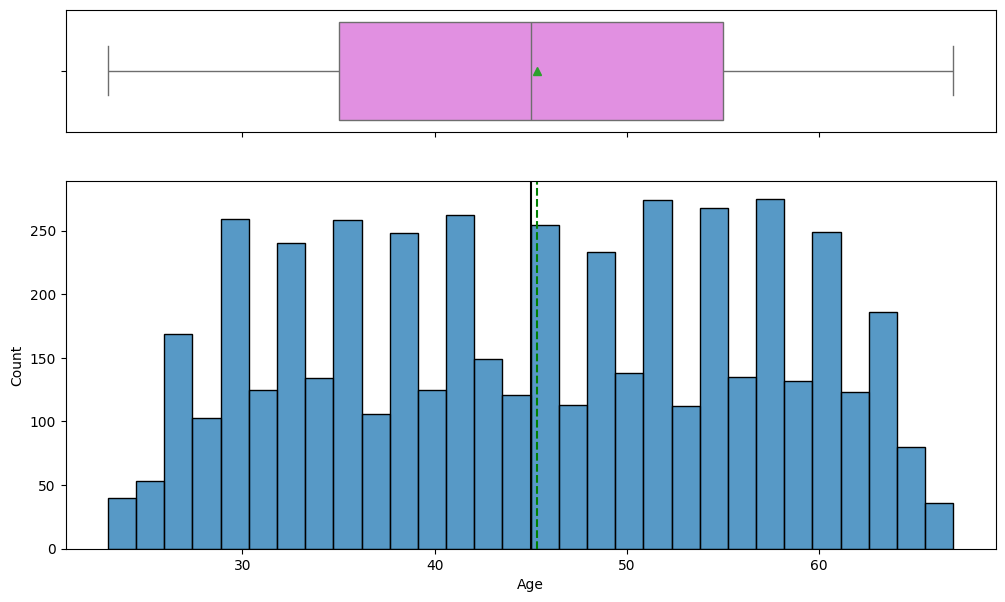

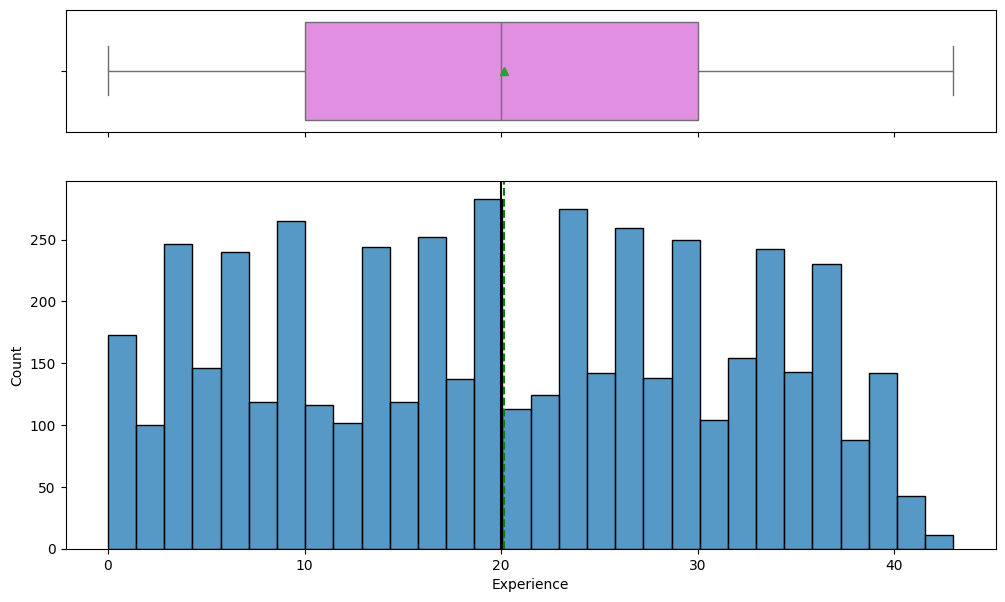

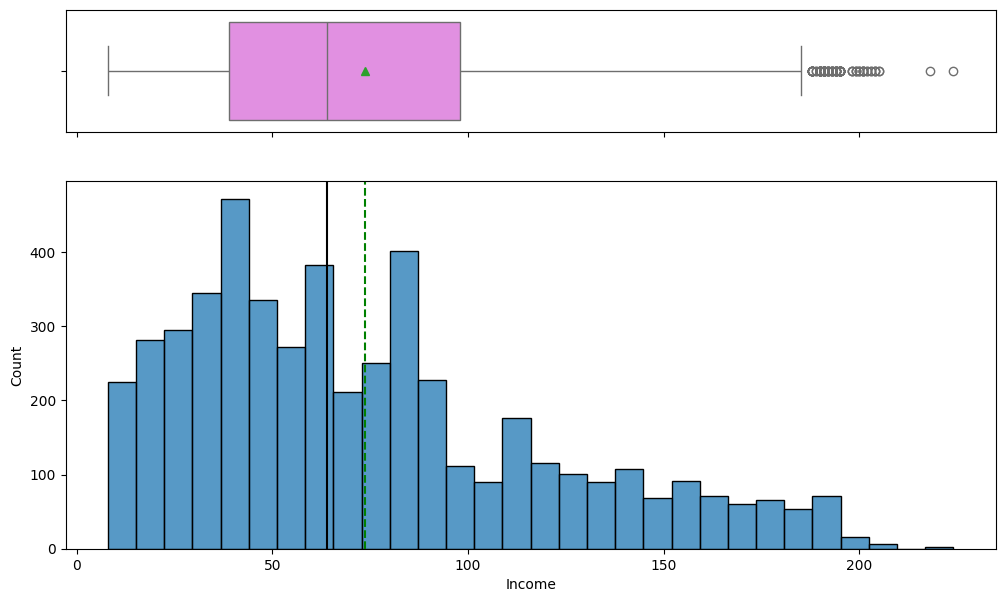

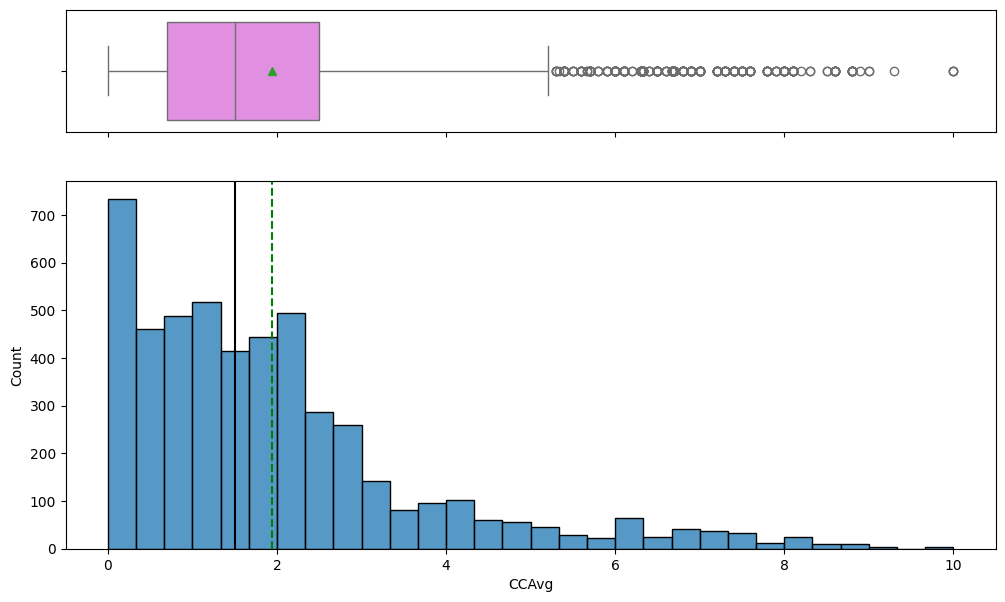

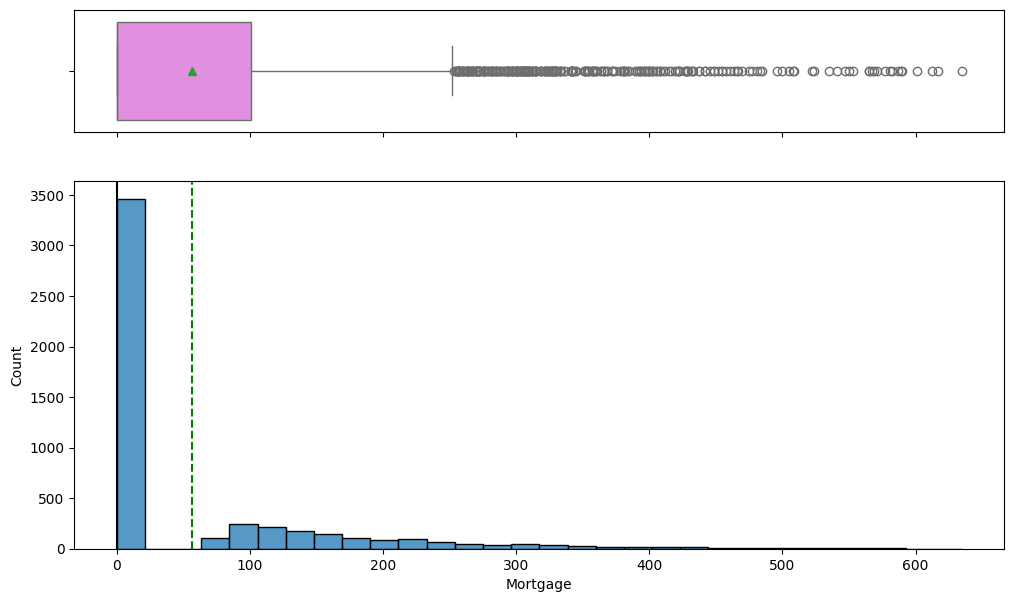

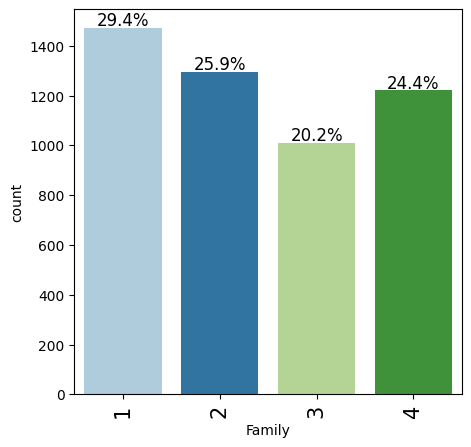

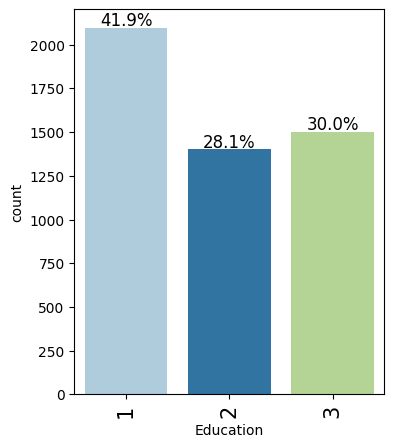

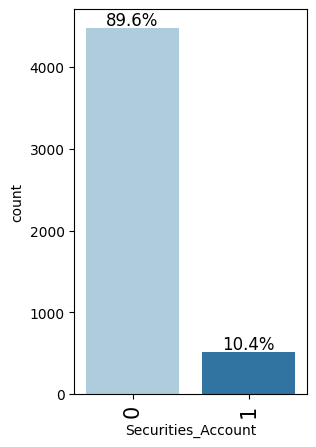

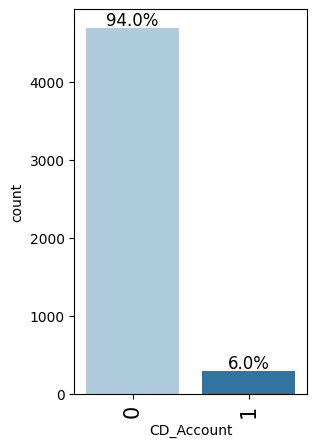

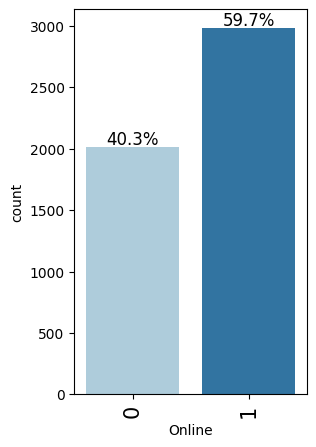

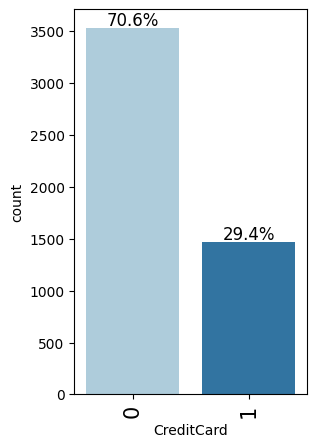

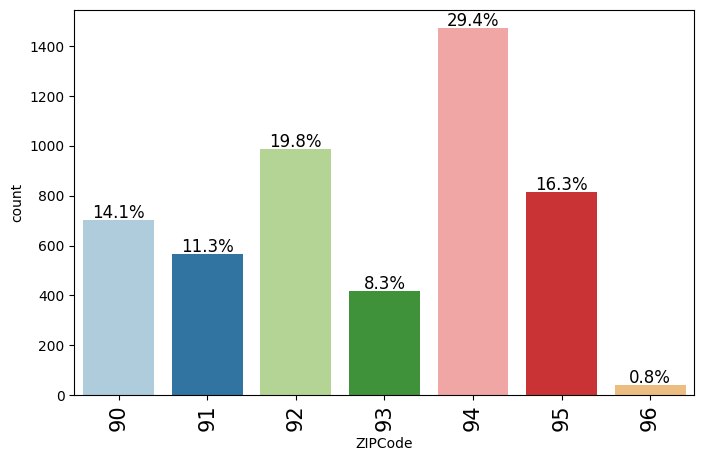

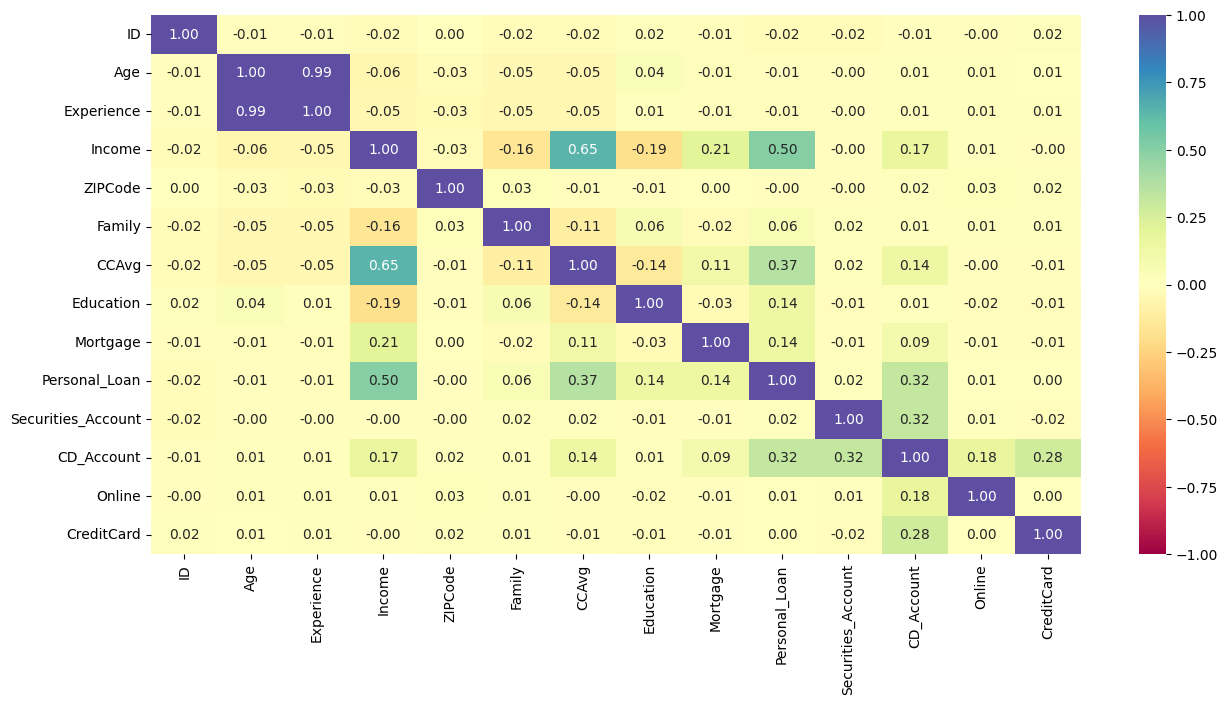

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


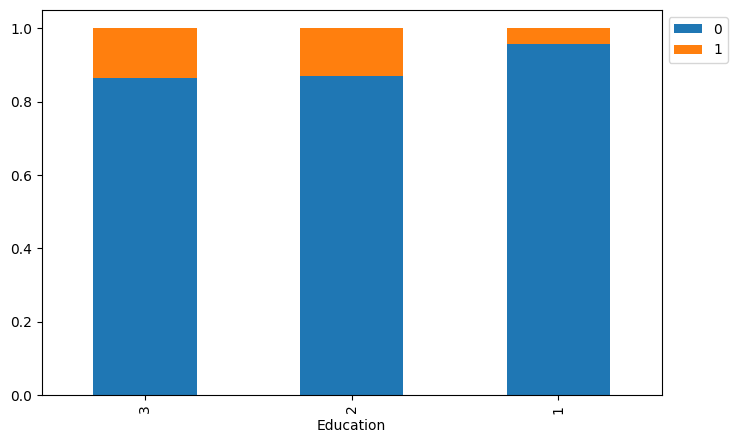

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


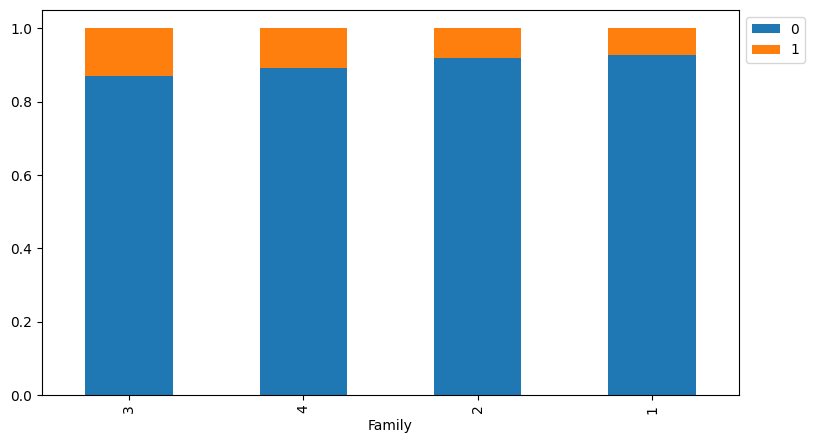

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


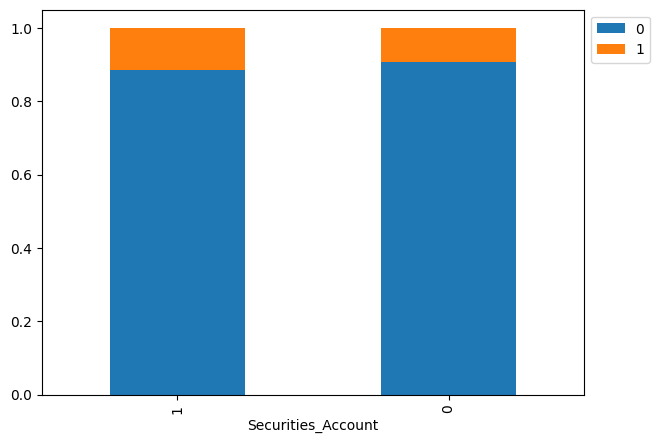

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


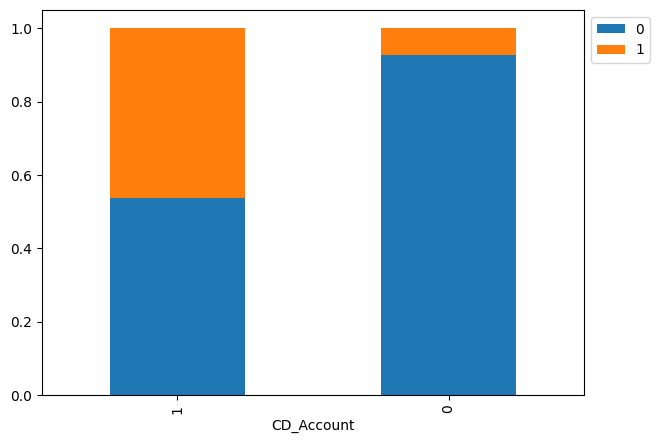

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


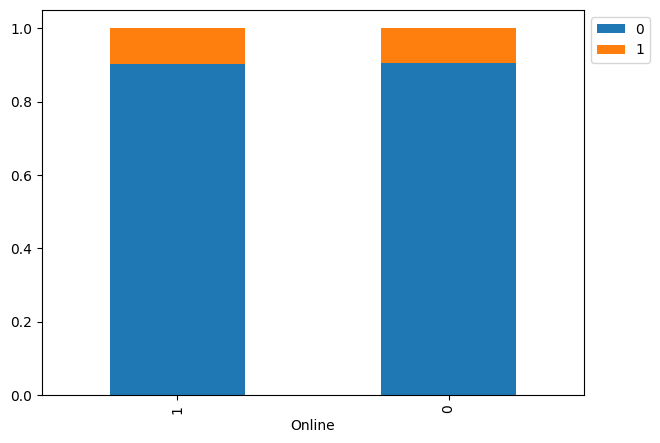

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


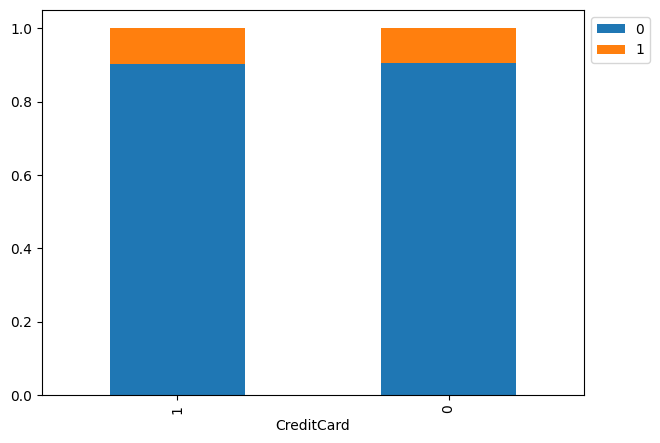

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


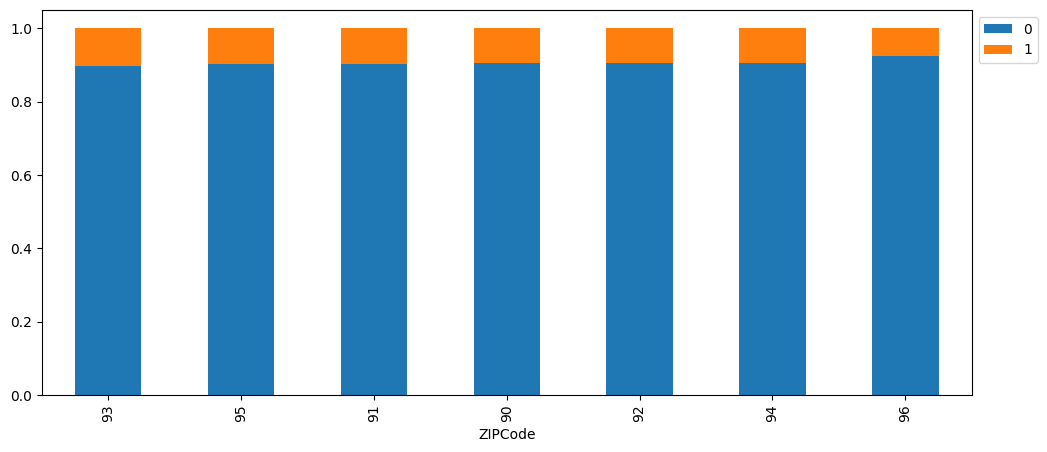

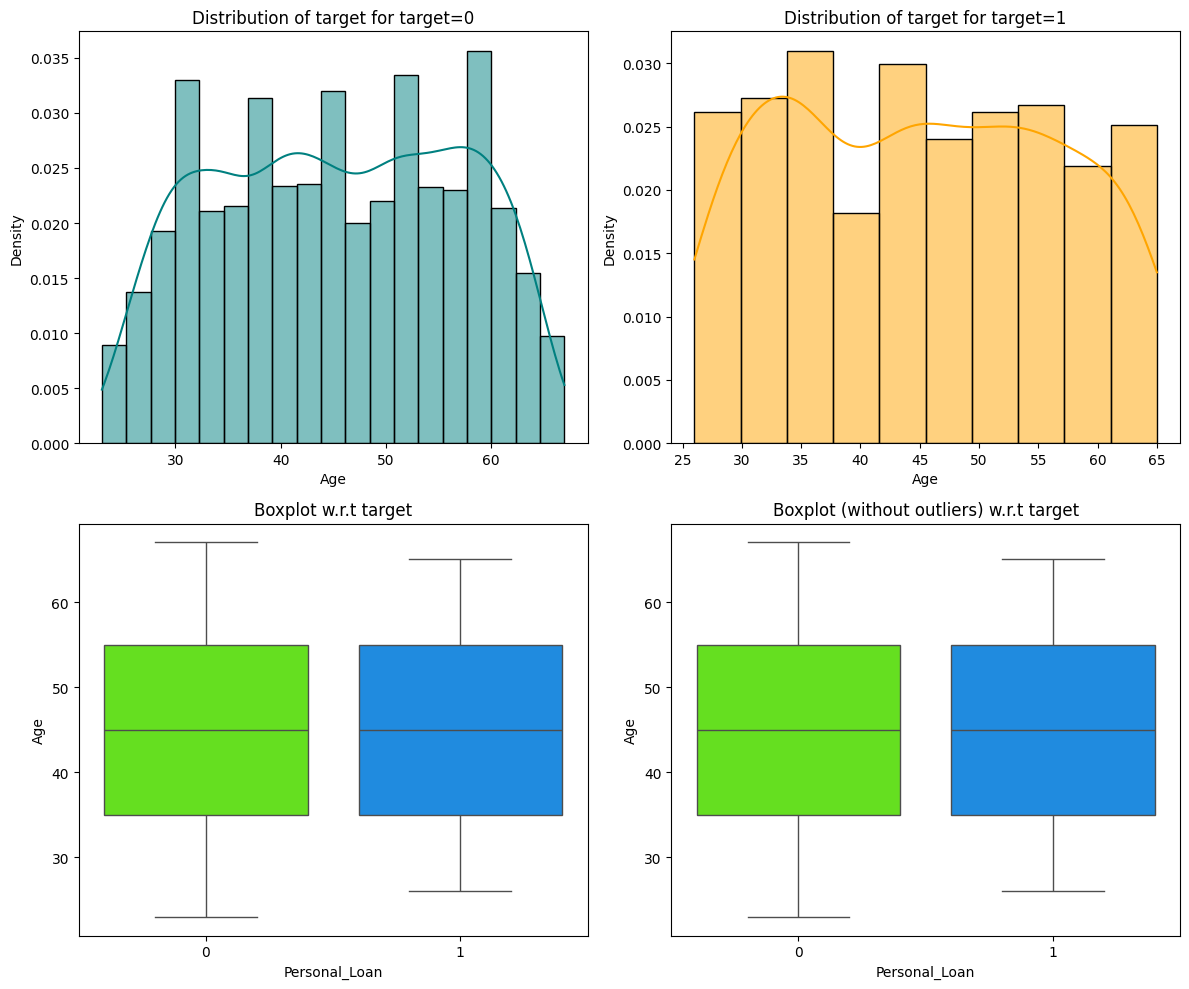

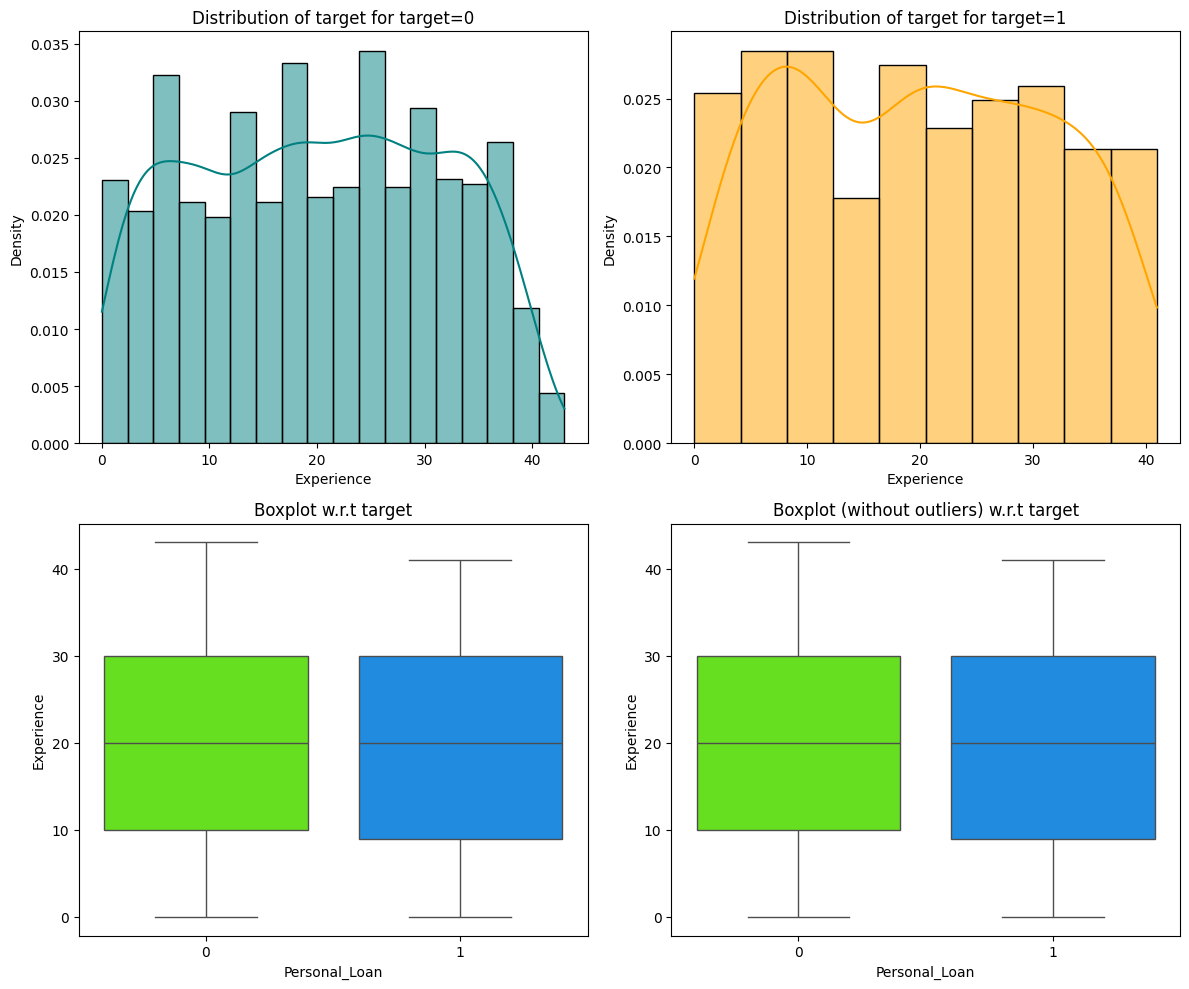

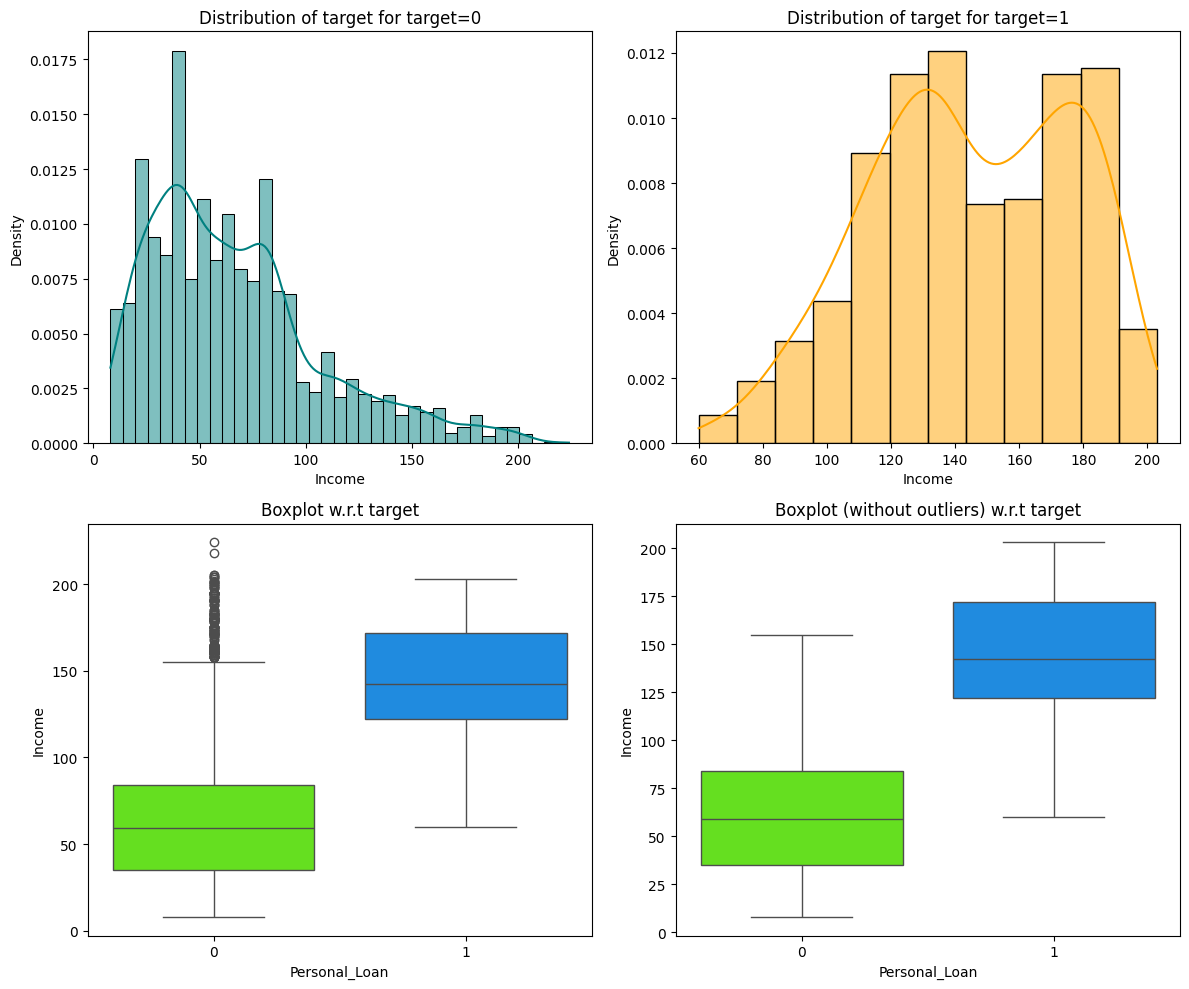

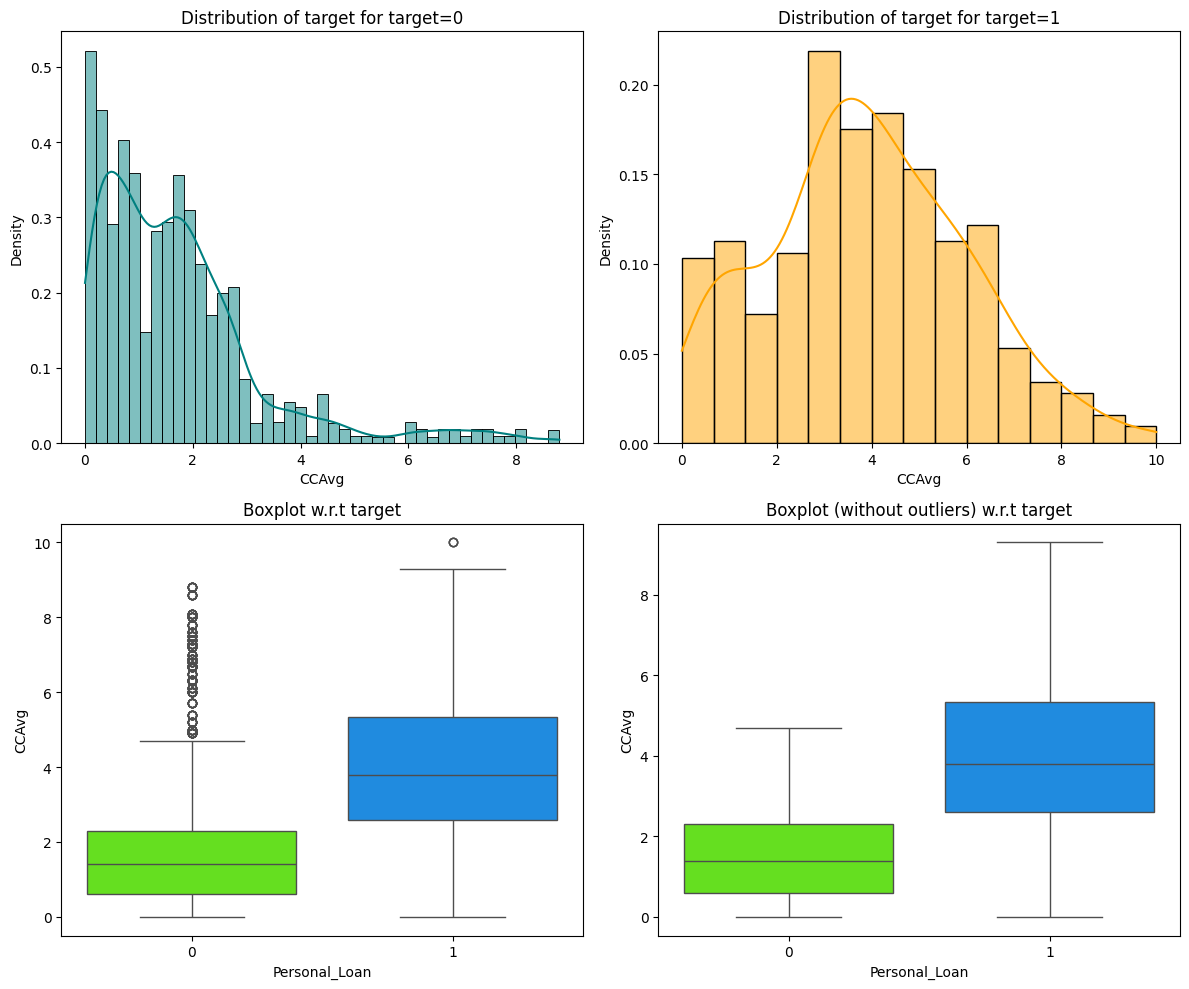

In [37]:
# Exploratory Data Analysis (EDA)

# Function to plot histogram and boxplot for a feature
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=30):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins)
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")
    plt.show()

# Function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        label = "{:.1f}%".format(100 * p.get_height() / total) if perc else p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")

    plt.show()

# Plotting distribution and boxplot for 'Age'
histogram_boxplot(data, "Age")

# Plotting distribution and boxplot for 'Experience'
histogram_boxplot(data, "Experience")

# Plotting distribution and boxplot for 'Income'
histogram_boxplot(data, "Income")

# Plotting distribution and boxplot for 'CCAvg'
histogram_boxplot(data, "CCAvg")

# Plotting distribution and boxplot for 'Mortgage'
histogram_boxplot(data, "Mortgage")

# Plotting labeled barplot for 'Family'
labeled_barplot(data, "Family", perc=True)

# Plotting labeled barplot for 'Education'
labeled_barplot(data, "Education", perc=True)

# Plotting labeled barplot for 'Securities_Account'
labeled_barplot(data, "Securities_Account", perc=True)

# Plotting labeled barplot for 'CD_Account'
labeled_barplot(data, "CD_Account", perc=True)

# Plotting labeled barplot for 'Online'
labeled_barplot(data, "Online", perc=True)

# Plotting labeled barplot for 'CreditCard'
labeled_barplot(data, "CreditCard", perc=True)

# Plotting labeled barplot for 'ZIPCode'
labeled_barplot(data, "ZIPCode", perc=True)

# Function to plot stacked bar charts
def stacked_barplot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=False)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(by=sorter, ascending=False)
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

# Function to plot distributions with respect to the target variable
def distribution_plot_wrt_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(data=data[data[target] == target_uniq[0]], x=predictor, kde=True, ax=axs[0, 0], color="teal", stat="density")

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(data=data[data[target] == target_uniq[1]], x=predictor, kde=True, ax=axs[0, 1], color="orange", stat="density")

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 1], showfliers=False, palette="gist_rainbow")

    plt.tight_layout()
    plt.show()

# Checking correlation matrix and plotting heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

# Checking how a customer's interest in purchasing a loan varies with their education
stacked_barplot(data, "Education", "Personal_Loan")

# Checking Personal_Loan vs Family
stacked_barplot(data, "Family", "Personal_Loan")

# Checking Personal_Loan vs Securities_Account
stacked_barplot(data, "Securities_Account", "Personal_Loan")

# Checking Personal_Loan vs CD_Account
stacked_barplot(data, "CD_Account", "Personal_Loan")

# Checking Personal_Loan vs Online
stacked_barplot(data, "Online", "Personal_Loan")

# Checking Personal_Loan vs CreditCard
stacked_barplot(data, "CreditCard", "Personal_Loan")

# Checking Personal_Loan vs ZIPCode
stacked_barplot(data, "ZIPCode", "Personal_Loan")

# Checking how a customer's interest in purchasing a loan varies with their age
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

# Checking Personal Loan vs Experience
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")

# Checking Personal Loan vs Income
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

# Checking Personal Loan vs CCAvg
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [39]:
# Data Preprocessing
# Outlier Detection

# Select only numeric columns for outlier detection
numeric_cols = data.select_dtypes(include=["float64", "int64"]).columns

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outlier detection
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Check the percentage of outliers in each column
outliers_percentage = ((data[numeric_cols] < lower) | (data[numeric_cols] > upper)).sum() / len(data) * 100
print("\nPercentage of outliers in each column:")
print(outliers_percentage)

# Data Preparation for Modeling
# Dropping Experience as it is perfectly correlated with Age
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

# Converting categorical variables to dummy variables
X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
print("\nShape of Training set:", X_train.shape)
print("Shape of test set:", X_test.shape)
print("\nPercentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))



Percentage of outliers in each column:
ID            0.00
Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

Shape of Training set: (3500, 18)
Shape of test set: (1500, 18)

Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

*


### Model Building


Percentage of outliers in each column:
ID            0.00
Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

Shape of Training set: (3500, 18)
Shape of test set: (1500, 18)

Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64

Post-Pruned Decision Tree Performance on Training Data:


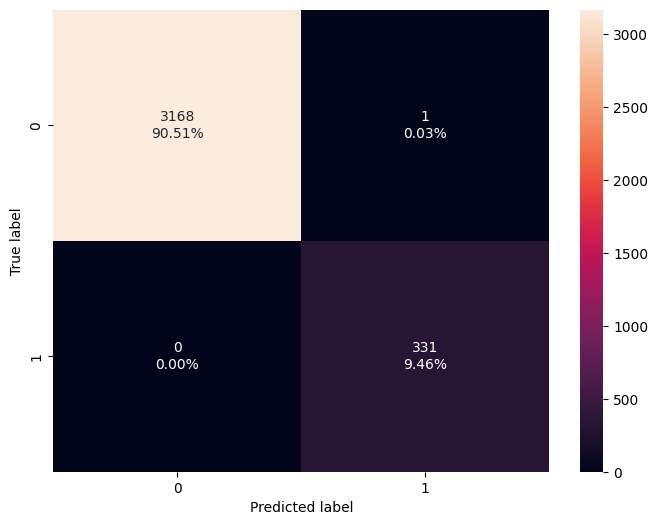

   Accuracy  Recall  Precision        F1
0  0.999714     1.0   0.996988  0.998492


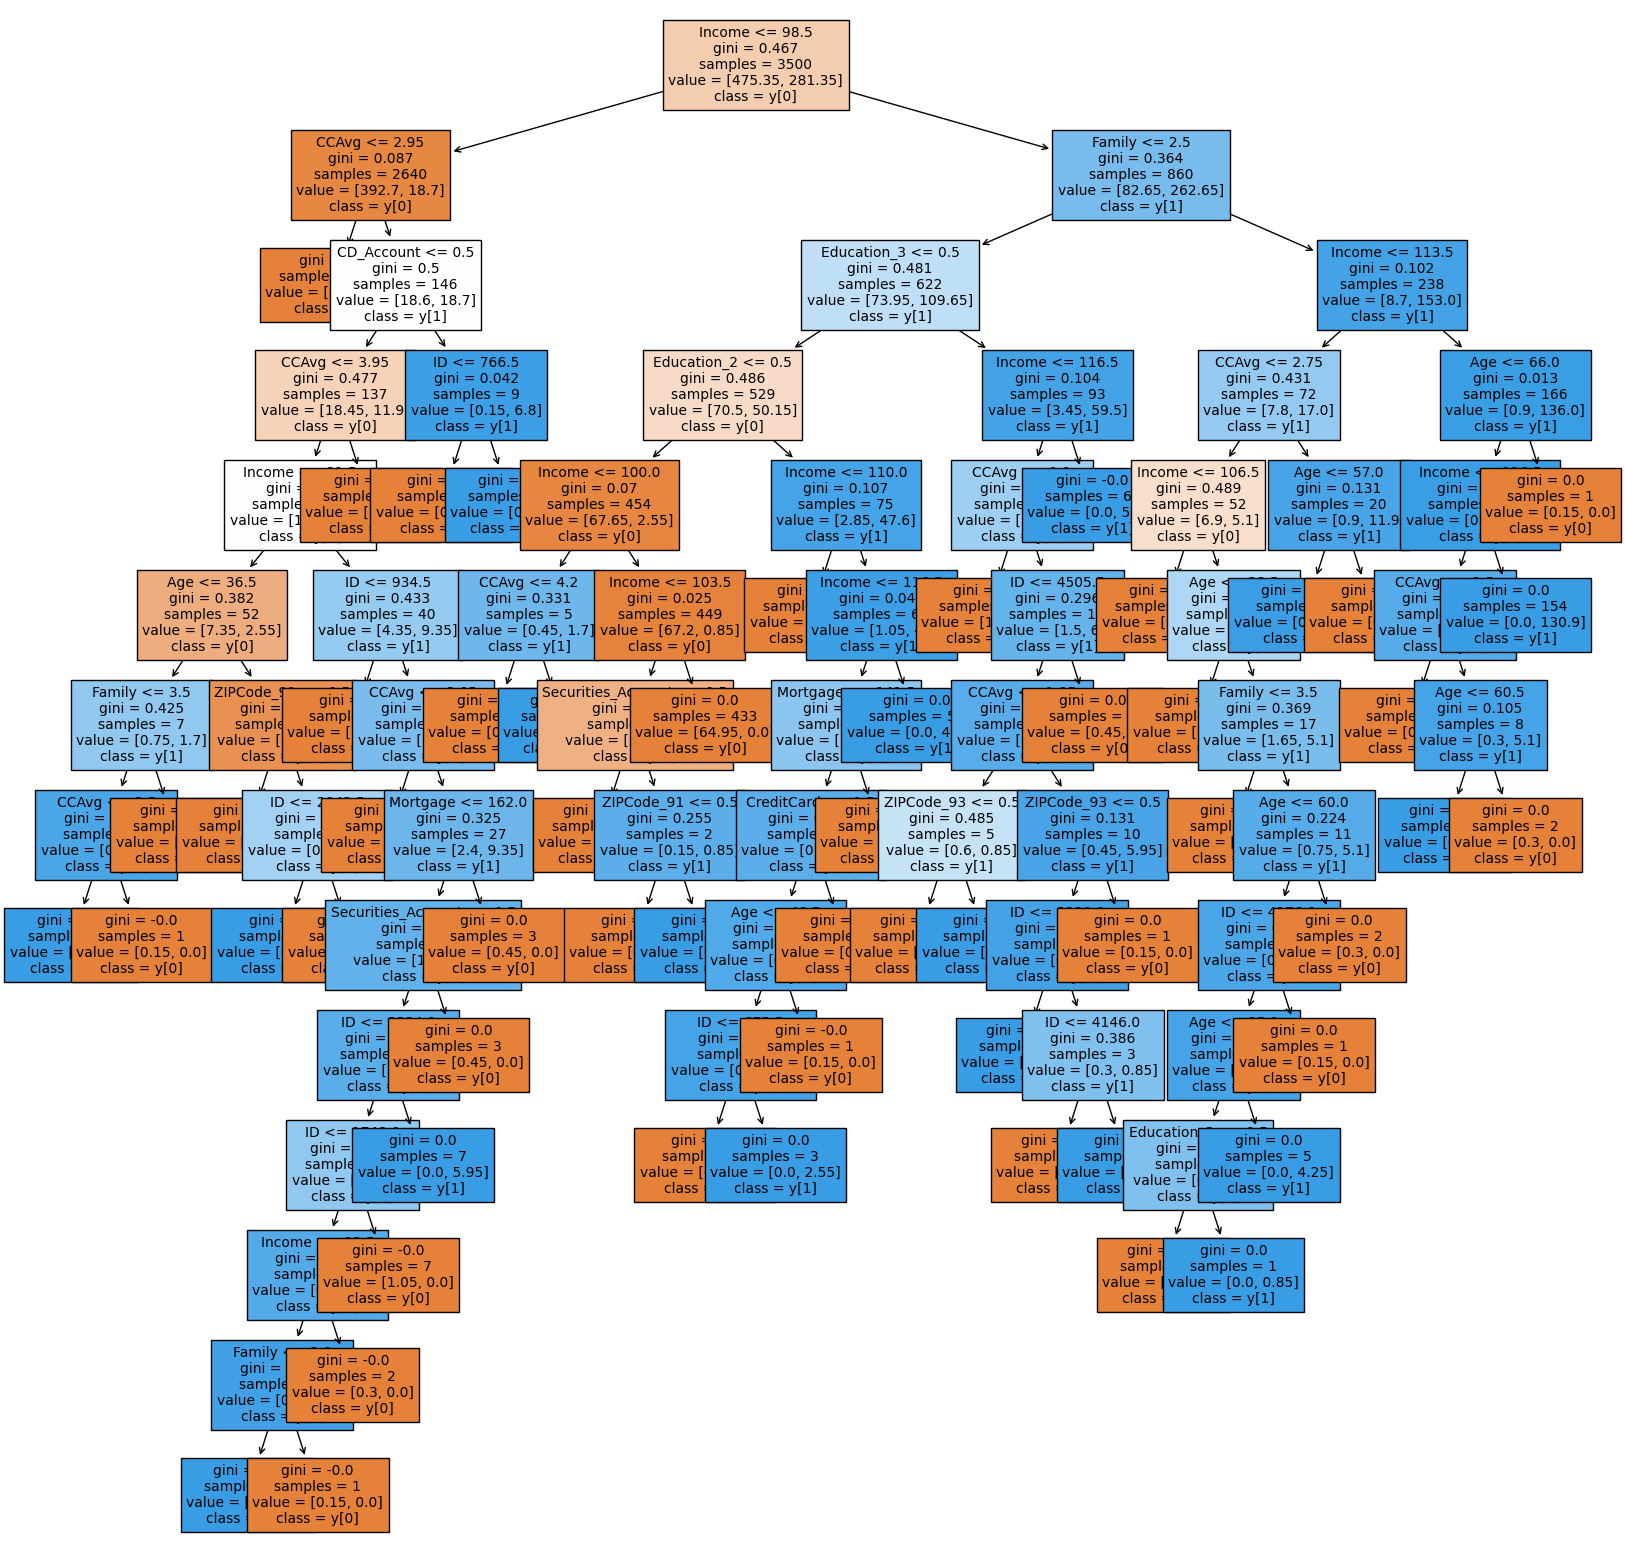


Post-Pruned Decision Tree Performance on Test Data:


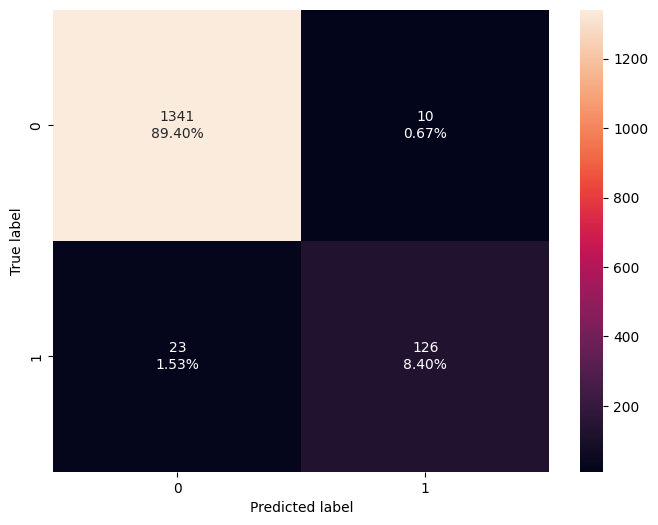

   Accuracy    Recall  Precision        F1
0     0.978  0.845638   0.926471  0.884211


In [41]:
# Data Preprocessing
# Outlier Detection

# Select only numeric columns for outlier detection
numeric_cols = data.select_dtypes(include=["float64", "int64"]).columns

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outlier detection
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Check the percentage of outliers in each column
outliers_percentage = ((data[numeric_cols] < lower) | (data[numeric_cols] > upper)).sum() / len(data) * 100
print("\nPercentage of outliers in each column:")
print(outliers_percentage)

# Data Preparation for Modeling
# Dropping Experience as it is perfectly correlated with Age
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

# Converting categorical variables to dummy variables
X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
print("\nShape of Training set:", X_train.shape)
print("Shape of test set:", X_test.shape)
print("\nPercentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

# Function to evaluate model performance and plot confusion matrix
def model_performance_classification_sklearn(model, predictors, target):
    pred = model.predict(predictors)
    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )
    return df_perf

def confusion_matrix_sklearn(model, predictors, target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

# Build and evaluate post-pruned decision tree
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=best_model.ccp_alpha, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
estimator_2.fit(X_train, y_train)

# Checking performance on training data
print("\nPost-Pruned Decision Tree Performance on Training Data:")
confusion_matrix_sklearn(estimator_2, X_train, y_train)
decision_tree_tune_post_train = model_performance_classification_sklearn(estimator_2, X_train, y_train)
print(decision_tree_tune_post_train)

# Visualizing the Decision Tree
plt.figure(figsize=(20, 20))
out = tree.plot_tree(
    estimator_2,
    feature_names=X_train.columns,
    filled=True,
    fontsize=10,
    node_ids=False,
    class_names=True,
)
# Adding arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

# Checking performance on test data
print("\nPost-Pruned Decision Tree Performance on Test Data:")
confusion_matrix_sklearn(estimator_2, X_test, y_test)
decision_tree_tune_post_test = model_performance_classification_sklearn(estimator_2, X_test, y_test)
print(decision_tree_tune_post_test)


### Model Performance Improvement

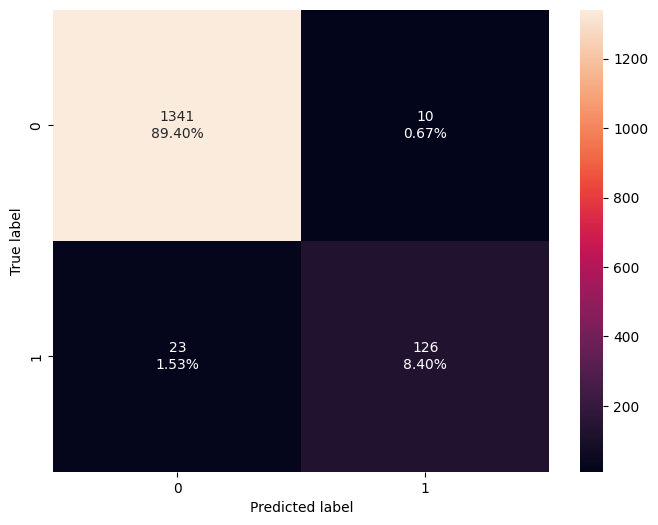


Post-Pruned Decision Tree Performance on Test Data:
   Accuracy    Recall  Precision        F1
0     0.978  0.845638   0.926471  0.884211

Training performance comparison:
           Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                     1.0                     0.987714   
Recall                       1.0                     0.873112   
Precision                    1.0                     0.996552   
F1                           1.0                     0.930757   

           Decision Tree (Post-Pruning)  
Accuracy                       0.999714  
Recall                         1.000000  
Precision                      0.996988  
F1                             0.998492  


In [42]:
# Checking performance on test data
confusion_matrix_sklearn(estimator_2, X_test, y_test)
decision_tree_tune_post_test = model_performance_classification_sklearn(estimator_2, X_test, y_test)
print("\nPost-Pruned Decision Tree Performance on Test Data:")
print(decision_tree_tune_post_test)

# Model Performance Comparison and Final Model Selection

# Training performance comparison
models_train_comp_df = pd.concat([decision_tree_perf_train.T, decision_tree_tune_perf_train.T, decision_tree_tune_post_train.T], axis=1)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("\nTraining performance comparison:")
print(models_train_comp_df)

## Model Comparison and Final Model Selection

In [44]:
# Testing performance comparison
models_test_comp_df = pd.concat([decision_tree_perf_test.T, decision_tree_tune_perf_test.T, decision_tree_tune_post_test.T], axis=1)
models_test_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("\nTest performance comparison:")
print(models_test_comp_df)

# # Convert the notebook to HTML (if running in Google Colab)
# !pip install nbconvert
# !jupyter nbconvert --to html AIML_ML_Project_low_code_notebook.ipynb
# from google.colab import files
# files.download('AIML_ML_Project_full_code_notebook.html')




Test performance comparison:
           Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.983333                     0.978667   
Recall                  0.892617                     0.785235   
Precision               0.936620                     1.000000   
F1                      0.914089                     0.879699   

           Decision Tree (Post-Pruning)  
Accuracy                       0.978000  
Recall                         0.845638  
Precision                      0.926471  
F1                             0.884211  


## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___